**Convolutional Neural Network**

The dataset of images will be stored in the google drive and accessed. Hence one need to mount the google drive by giving access to it.

Keep the dataset in the main path. Sometimes having spaces in folder creates problem!

In my drive the datasets are stored in '/content/drive/MyDrive/dataset'
Inside the dataset folder, three subfolders named train, validation and test are created. Inside each of the three subfolders, two classes of interest cats and dogs folders are created where the images are stored for all three categories

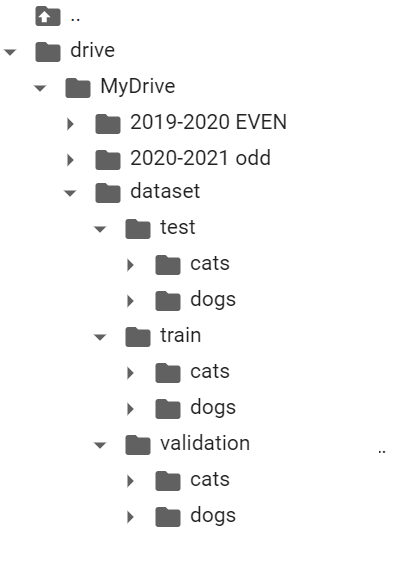



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


For easy access, we are storing the path in different variables

In [2]:
train_path='/content/drive/MyDrive/Multi-class Weather Dataset/train'
valid_path='/content/drive/MyDrive/Multi-class Weather Dataset/validation'
test_path='/content/drive/MyDrive/Multi-class Weather Dataset/test'

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator



**ImageDataGenerator**

Generate batches of tensor image data with real-time data augmentation

[To learn more about ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

In [4]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=50)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=50)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['Cloudy','Rain','Shine','Sunrise'],batch_size=50,shuffle=False)

Found 764 images belonging to 4 classes.
Found 69 images belonging to 4 classes.
Found 292 images belonging to 4 classes.


In [5]:
imgs,labels=next(train_batches)

To see the output of datagenerator we are creating custom function which displays 10 images 

In [6]:
# this fncn will plot imgs in the form of 1x10 where imgs are placed
def plotImages(images_arr):
  fig,axes=plt.subplots(1,10,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

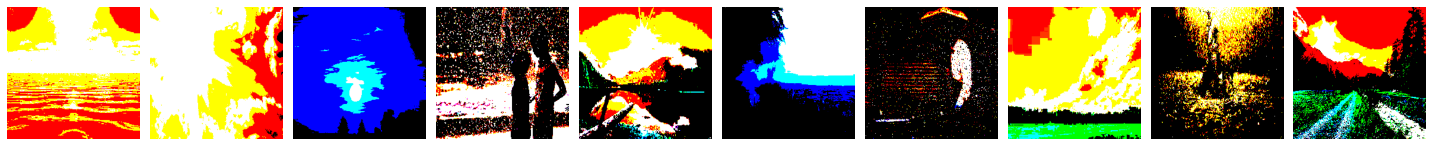

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [7]:
import matplotlib.pyplot as plt

plotImages(imgs)
print(labels)

Importing necessary packages for convolution neural network

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [9]:
model=Sequential([
                  Dense(units=1, activation='sigmoid',input_shape=(224,224,3)),
                  Flatten(),
                  Dense(units=4,activation='softmax'), 
])

In [10]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 224, 224, 1)       4         
                                                                 
 flatten (Flatten)           (None, 50176)             0         
                                                                 
 dense_1 (Dense)             (None, 4)                 200708    
                                                                 
Total params: 200,712
Trainable params: 200,712
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(x=train_batches,validation_data=valid_batches,epochs=7,verbose=1)

Epoch 1/7
16/16 [==============================] - 201s 13s/step - loss: 1.9734 - accuracy: 0.3573 - val_loss: 1.5365 - val_accuracy: 0.3913
Epoch 2/7
16/16 [==============================] - 10s 665ms/step - loss: 1.3735 - accuracy: 0.4830 - val_loss: 1.3432 - val_accuracy: 0.4493
Epoch 3/7
16/16 [==============================] - 11s 674ms/step - loss: 1.1210 - accuracy: 0.5380 - val_loss: 1.4029 - val_accuracy: 0.4493
Epoch 4/7
16/16 [==============================] - 12s 746ms/step - loss: 1.0928 - accuracy: 0.5458 - val_loss: 1.2873 - val_accuracy: 0.4928
Epoch 5/7
16/16 [==============================] - 11s 643ms/step - loss: 0.9518 - accuracy: 0.6139 - val_loss: 1.2481 - val_accuracy: 0.5507
Epoch 6/7
16/16 [==============================] - 11s 725ms/step - loss: 0.9244 - accuracy: 0.6060 - val_loss: 1.2398 - val_accuracy: 0.5217
Epoch 7/7
16/16 [==============================] - 11s 665ms/step - loss: 0.8949 - accuracy: 0.6387 - val_loss: 1.2105 - val_accuracy: 0.5362


In [13]:
predictions=model.predict(x=test_batches,verbose=0)

In [14]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [15]:
cm=confusion_matrix(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1))

In [16]:

def plot_confusion_matrix(cm,classes,normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

  """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix,without Normalization')
    print(cm)


    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
      


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix,without Normalization
[[45  3  4 24]
 [28  8 14  6]
 [15  3 30 12]
 [17  5  4 74]]


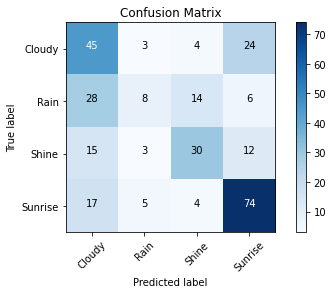

In [17]:
cm_plot_labels=['Cloudy','Rain','Shine','Sunrise']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion Matrix')

In [19]:
from sklearn.metrics import f1_score

In [20]:
f1_score(y_true=test_batches.classes,y_pred=np.argmax(predictions,axis=-1),average='micro')

0.5376712328767124